
# Davis Club : Assignment 6

Davis Southern Club Women

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.


In [17]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite, community
import numpy as np
import pandas as pd

In [3]:
# Load the Davis Southern Women Graph
G = nx.davis_southern_women_graph()
women = G.graph["top"]  # Women nodes
clubs = G.graph["bottom"]  # Event nodes

In [ ]:
# Print the biadjacency matrix
print("Biadjacency matrix:")
print(bipartite.biadjacency_matrix(G, women, clubs).toarray())

In [ ]:
# Project bipartite graph onto women nodes (Unweighted projection)
W = bipartite.projected_graph(G, women)
print("\n#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

In [ ]:
# Project bipartite graph onto women nodes keeping number of co-occurrences
# This weighted projection counts the total number of shared events attended together
W_weighted = bipartite.weighted_projected_graph(G, women)
print("\n#Friend meetings, Member")
for w in women:
    print(f"{W_weighted.degree(w, weight='weight')} {w}")

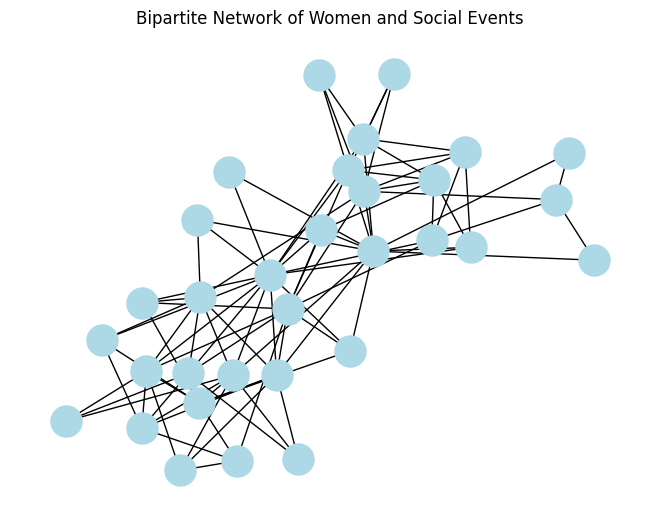

In [10]:
# Visualize the bipartite network
pos = nx.spring_layout(G, seed=648) 
nx.draw(G, pos, with_labels=False, node_size=500, node_color="lightblue")
plt.title("Bipartite Network of Women and Social Events")
plt.show()


Community Detection Among Women
Community 1: ['Dorothy Murchison', 'Evelyn Jefferson', 'Flora Price', 'Helen Lloyd', 'Katherina Rogers', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson']
Community 2: ['Brenda Rogers', 'Charlotte McDowd', 'Eleanor Nye', 'Frances Anderson', 'Laura Mandeville', 'Verne Sanderson']


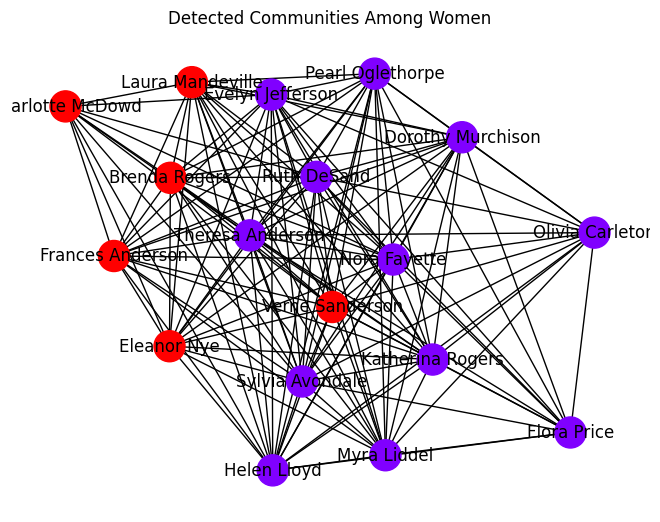

In [18]:
print("\nCommunity Detection Among Women")
communities = community.greedy_modularity_communities(W)
for i, comm in enumerate(communities, 1):
    print(f"Community {i}: {sorted(comm)}")

# Draw detected communities
color_map = {}
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = colors[i]

node_colors = [color_map[node] for node in W.nodes()]
pos_women = nx.spring_layout(W, seed=42)
nx.draw(W, pos_women, with_labels=True, node_size=500, node_color=node_colors)
plt.title("Detected Communities Among Women")
plt.show()


Event Popularity and Impact
Most popular event: E8 with 14 attendees
Least popular event: E1 with 3 attendees


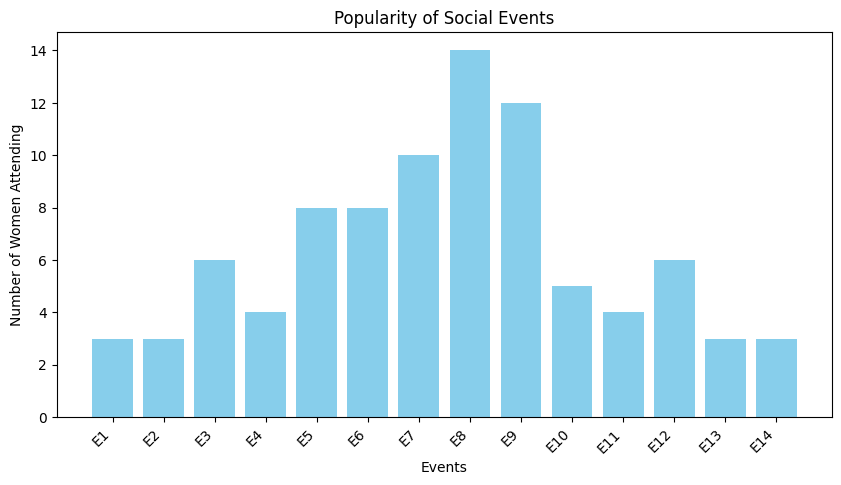

In [19]:
print("\nEvent Popularity and Impact")
event_degrees = {club: G.degree(club) for club in clubs}
most_popular_event = max(event_degrees, key=event_degrees.get)
least_popular_event = min(event_degrees, key=event_degrees.get)

print(f"Most popular event: {most_popular_event} with {event_degrees[most_popular_event]} attendees")
print(f"Least popular event: {least_popular_event} with {event_degrees[least_popular_event]} attendees")

# Visualizing event participation
plt.figure(figsize=(10, 5))
plt.bar(event_degrees.keys(), event_degrees.values(), color='skyblue')
plt.xlabel("Events")
plt.ylabel("Number of Women Attending")
plt.title("Popularity of Social Events")
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Compute centrality measures for women
betweenness_centrality = nx.betweenness_centrality(W_weighted, weight='weight')
closeness_centrality = nx.closeness_centrality(W_weighted)
degree_centrality = nx.degree_centrality(W_weighted)

In [12]:
# Store results in a DataFrame
centrality_df = pd.DataFrame({
    "Woman": list(W_weighted.nodes),
    "Degree Centrality": [degree_centrality[w] for w in W_weighted.nodes],
    "Betweenness Centrality": [betweenness_centrality[w] for w in W_weighted.nodes],
    "Closeness Centrality": [closeness_centrality[w] for w in W_weighted.nodes]
})

In [13]:
# Display centrality measures
print("\nCentrality Measures for Women:")
print(centrality_df.sort_values(by="Degree Centrality", ascending=False))


Centrality Measures for Women:
                Woman  Degree Centrality  Betweenness Centrality  \
0    Evelyn Jefferson           1.000000                0.000668   
8         Ruth DeSand           1.000000                0.000668   
14        Helen Lloyd           1.000000                0.061689   
13       Nora Fayette           1.000000                0.010924   
12    Sylvia Avondale           1.000000                0.018464   
9     Verne Sanderson           1.000000                0.018464   
2    Theresa Anderson           1.000000                0.000668   
7    Pearl Oglethorpe           0.941176                0.000668   
10        Myra Liddel           0.941176                0.053729   
11   Katherina Rogers           0.941176                0.053729   
15  Dorothy Murchison           0.941176                0.095770   
6         Eleanor Nye           0.882353                0.004552   
5    Frances Anderson           0.882353                0.057861   
1    Laura Mande

Centrality measures (degree, betweenness, closeness) indicate the most socially connected women.
Women with high betweenness centrality serve as "bridges" between groups, linking different social clusters.

In [14]:
# Compute event popularity based on attendance
event_popularity = {event: G.degree(event) for event in clubs}
event_popularity_df = pd.DataFrame(list(event_popularity.items()), columns=["Event", "Number of Attendees"])
print("\nEvent Popularity:")
print(event_popularity_df.sort_values(by="Number of Attendees", ascending=False))


Event Popularity:
   Event  Number of Attendees
7     E8                   14
8     E9                   12
6     E7                   10
4     E5                    8
5     E6                    8
2     E3                    6
11   E12                    6
9    E10                    5
3     E4                    4
10   E11                    4
0     E1                    3
1     E2                    3
12   E13                    3
13   E14                    3


Event popularity analysis shows which gatherings had the highest attendance. Certain events might be central to the network, meaning they played a significant role in bringing women together.

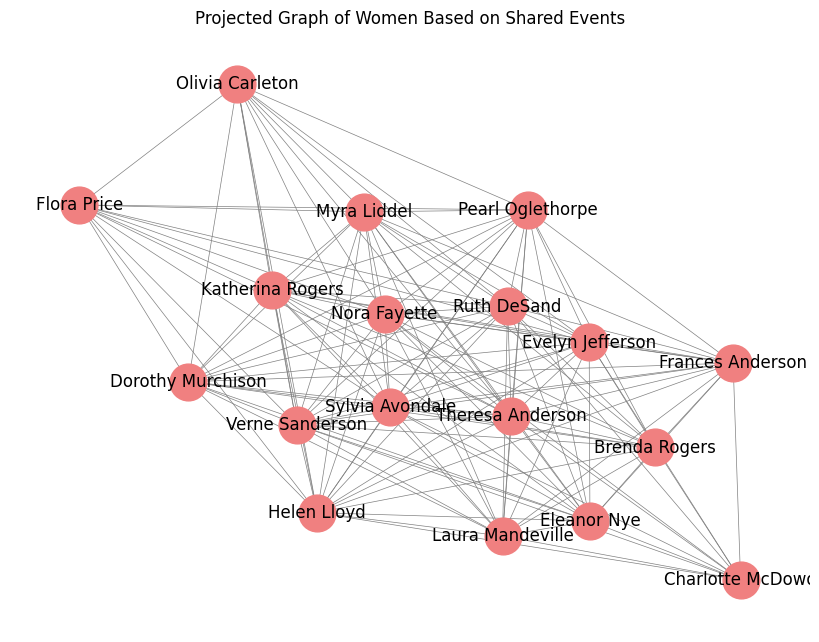

In [15]:
# Visualizing the women projection graph
plt.figure(figsize=(8, 6))
pos_w = nx.spring_layout(W_weighted, seed=648)
nx.draw(W_weighted, pos_w, with_labels=True, node_size=700, node_color="lightcoral", edge_color="gray", width=0.5)
plt.title("Projected Graph of Women Based on Shared Events")
plt.show()